# Passive Vehicular Sensors Datasets (PVS) - Data Exploration

In this notebook, we detail the **Passive Vehicular Sensors Datasets (PVS)** 1-9 in the form of interactive maps illustrating the data classes and tables with the data distribution. These datasets contain data from accelerometer, gyroscope, magnetometer, temperature, GPS and camera sampled in vehicles.For more information on PVS datasets and the project **Intelligent Vehicle Perception Based on Inertial Sensing and Artificial Intelligence**, please visit the page on [GitHub](https://github.com/Intelligent-Vehicle-Perception/Intelligent-Vehicle-Perception-Based-on-Inertial-Sensing-and-Artificial-Intelligence) or [Kaggle](https://www.kaggle.com/jefmenegazzo/pvs-passive-vehicular-sensors-datasets).

## Sensor Network

We use several passive approach sensors to collect data to create the nine **Passive Vehicular Sensors Datasets (PVS)**, detailed in the following table:

|      Hardware     |     Sensor    |                   Data                  | Sampling Rate |
|:-----------------|:-------------|:---------------------------------------|:-------------|
| HP Webcam HD-4110 | Camera        | 720p Video                              |     30 Hz     |
| Xiaomi Mi 8       | GPS           | Speed in m/s, latitude, longitude, etc. |      1 Hz     |
| MPU-9250          | Accelerometer | 3-axis acceleration in m/s²             |     100 Hz    |
| MPU-9250          | Gyroscope     | 3-axis rotation rate in deg/s           |     100 Hz    |
| MPU-9250          | Magnetometer  | 3-axis ambient geomagnetic field in µT  |     100 Hz    |
| MPU-9250          | Temperature   | Sensor temperature in ◦C                |     100 Hz    |

All the hardware equipment was attached to the vehicle as shown in the next figure. The camera was placed on the outside car roof **(1)**. The GPS receiver was placed internally on the dashboard **(2)**. Two networks with MPU-9250 modules were distributed in the vehicle to get data coming from different points. Thus, each end of the front axle (right and left side) received one of the sensor networks, where a module was attached to the control arm **(4)**, located below and near to the vehicle’s suspension system; another module was placed above and near the suspension system, attached to the body immediately above the tire **(3)**; and a third module was attached to the vehicle’s dashboard **(2)**, inside the cabin.

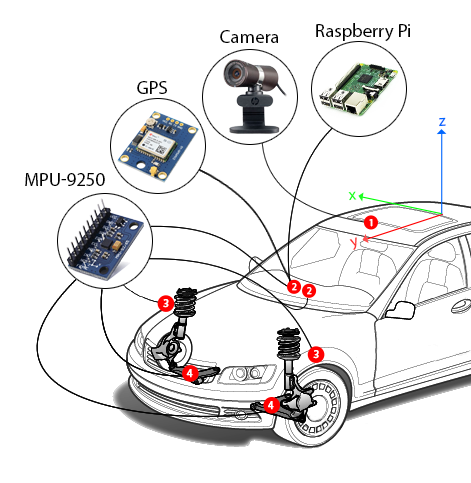

The data were produced in three different vehicles, with three different drivers, in three different environments in which there are three different surface types, in addition to variations in conservation state and presence of obstacles and anomalies, such as speed bumps and potholes. The following table details the data collection contexts:

| DataSet |       Vehicle      |  Driver  |  Scenario  | Distance |
|:-------|:------------------|:--------|:----------|:--------|
| PVS 1   | Volkswagen Saveiro | Driver 1 | Scenario 1 | 13.81 km |
| PVS 2   | Volkswagen Saveiro | Driver 1 | Scenario 2 | 11.62 km |
| PVS 3   | Volkswagen Saveiro | Driver 1 | Scenario 3 | 10.72 km |
| PVS 4   | Fiat Bravo         | Driver 2 | Scenario 1 | 13.81 km |
| PVS 5   | Fiat Bravo         | Driver 2 | Scenario 2 | 11.63 km |
| PVS 6   | Fiat Bravo         | Driver 2 | Scenario 3 | 10.73 km |
| PVS 7   | Fiat Palio         | Driver 3 | Scenario 1 | 13.78 km |
| PVS 8   | Fiat Palio         | Driver 3 | Scenario 2 | 11.63 km |
| PVS 9   | Fiat Palio         | Driver 3 | Scenario 3 | 10.74 km |

Each dataset consists of the following files:

| File                       | Description                                                                                                            |
|:----------------------------|:------------------------------------------------------------------------------------------------------------------------|
| dataset_gps.csv            | GPS data, including latitude, longitude, altitude, speed, accuracy, etc.                                               |
| dataset_gps_mpu_left.csv   | Inertial sensor data on the left side of the vehicle, combined with GPS data.                                          |
| dataset_gps_mpu_right.csv  | Inertial sensor data on the right side of the vehicle, combined with GPS data.                                         |
| dataset_labels.csv         | Data classes for each sample data in the dataset (for both sides).                                                |
| dataset_mpu_left.csv       | Inertial sensor data on the left side of the vehicle.                                                                  |
| dataset_mpu_right.csv      | Inertial sensor data on the right side of the vehicle.                                                                 |
| dataset_settings_left.csv  | Settings of the inertial sensors placed on the left side of the vehicle. Includes measurement range, resolution, etc.  |
| dataset_settings_right.csv | Settings of the inertial sensors placed on the right side of the vehicle. Includes measurement range, resolution, etc. |
| map.html                   | Interactive maps with data classes.                                                                                  |
| video_dataset_left.mp4     | Video with data plotted from inertial sensors and speed, sampled on the left side of the vehicle.                      |
| video_dataset_right.mp4    | Video with data plotted from inertial sensors and speed, sampled on the right side of the vehicle.                     |
| video_environment.mp4      | External environment video.                                                                                            |
| video_environment_dataset_left.mp4      | Videos side by side from video_environment.mp4 and video_dataset_left.mp4                                 |
| video_environment_dataset_right.mp4     | Videos side by side from video_environment.mp4 and video_dataset_right.mp4                                 |

## Data Classes

The data classes are available in the **dataset_labels.csv** file were built in one-hot-encoded form. The following labels are available:

#### Road Surface Type

|    Description   |    Label    |
|:----------------|:-----------|
| Dirt Road        | dirt_road        |
| Cobblestone Road | cobblestone_road |
| Asphalt Road     | asphalt_road     |

#### Road Surface Condition

|    Description   |    Label    |
|:----------------|:-----------|
| Paved Road       | paved_road   |
| Unpaved Road     | unpaved_road |

#### Road Roughness Condition

|    Description   |    Label    |
|:----------------|:-----------|
| Good Road        | good_road_left, good_road_right        |
| Regular Road | regular_road_left, regular_road_right |
| Bad Road     | bad_road_left, bad_road_right     |

#### Speed Bump

|    Description   |    Label    |
|:----------------|:-----------|
| No Speed Bump        | no_speed_bump        |
| Speed Bump in Asphalt   | speed_bump_asphalt   |
| Speed Bump in Cobblestone | speed_bump_cobblestone |

## Preparing the Environment

First, we need to import the packages used in this Jupyter Notebook:

In [ ]:
import os
import json
import folium
import pandas as pd
import numpy as np
from zipfile import ZipFile
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML, Video
%matplotlib inline
# %matplotlib notebook
pd.set_option("float_format", '{:0.2f}'.format)
pd.set_option('display.max_columns', 30)

In [ ]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

Then we define the folders where the datasets are stored:

In [ ]:
if IN_COLAB:
    datasets_folder = './pvs-passive-vehicular-sensors-datasets/' # In Google Colab
else:
    datasets_folder = '../input/pvs-passive-vehicular-sensors-datasets/' # In Kaggle

## Downloading Datasets

Follow the instructions for the environment you are running between Kaggle or Google Colab/Other.

### Running on Kaggle

If you are running this notebook on Kaggle, just follow the next steps:

```
This Notebook -> Add Data -> Search for 'PVS' -> Add  'PVS - Passive Vehicular Sensors Datasets'
```

### Running on Google Colab/Other

If you are running this notebook on Google Colab or other environment such as Binder, first you need to register on Kaggle. After, go to:

```
Main Menu -> My Account -> API -> Create New API Token
```

This will download a file **kaggle.json**. Copy the content to params above. If you have any problem, check the tutorial [here](https://medium.com/@opalkabert/downloading-kaggle-datasets-into-google-colab-fb9654c94235).

In [ ]:
kaggle_json = {"username":"","key":""}

Next, this code will create a local **kaggle.json** file:

In [ ]:
with open('./kaggle.json', 'w') as f:
    json.dump(kaggle_json, f)

Next, create Kaggle API:

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

And list the PVS datasets avalilable to download:

In [ ]:
api.dataset_list_cli(search="jefmenegazzo/passive-vehicular-sensors-dataset-pvs")

Next, download the datasets:

In [ ]:
if os.path.exists(datasets_folder):
    shutil.rmtree(datasets_folder)

load_bar_datasets = tqdm(desc="Datasets Download", total=9)
load_bar_files = tqdm(desc="Files Download", total=3)

for dataset in range(1,10):
    dataset_path = os.path.join(datasets_folder, "PVS " + str(dataset)) 
    os.makedirs(dataset_path)
    load_bar_files.reset()

    for file in ["dataset_gps_mpu_left.csv", "dataset_gps_mpu_right.csv", "dataset_labels.csv"]:
        dataset_kaggle = 'jefmenegazzo/pvs-passive-vehicular-sensors-datasets'
        api.dataset_download_file(dataset=dataset_kaggle, file_name="PVS " + str(dataset) + "/" + file, path=dataset_path)
        load_bar_files.update(1)

    load_bar_datasets.update(1)

Next, unzip all files:

In [ ]:
for dataset in range(1,10):
    
    dataset_path = datasets_folder + "/PVS " + str(dataset)

    for file in os.listdir(dataset_path):
        
        zip_file = os.path.join(dataset_path, file)

        with ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(dataset_path)
        
        os.remove(zip_file)

## Defining Utility Functions

Here we define utility functions to load datasets from disk, create maps and tables with data.

In [ ]:
# Returns all loaded datasets
def getDatasets():

    pvs = {}
    
    for i in range(1,10):
    
        folder = os.path.join(datasets_folder, "PVS " + str(i))
        data_left = pd.read_csv(os.path.join(folder, 'dataset_gps_mpu_left.csv'), float_precision="high")
        data_right = pd.read_csv(os.path.join(folder, 'dataset_gps_mpu_right.csv'), float_precision="high")
        data_labels = pd.read_csv(os.path.join(folder, 'dataset_labels.csv'))

        pvs["pvs_" + str(i)] = {
            "data_left": data_left,
            "data_right": data_right,
            "data_labels": data_labels
        }

    return pvs

# Shows data classes on a plot
def plotDataClass(pvs, classes):
    
    data_labels = datasets["pvs_" + str(pvs)]["data_labels"]
    plt.figure(figsize=(16,6)) 
    
    for i in range(0, len(classes)):
        classe = classes[i]
        (data_labels[classe] * (i+1)).plot(linewidth=2)

    plt.legend()

# Shows data classes on a map
def createMapDataClass(pvs, classes, colors, zoom_start=14):
    
    dataset = datasets["pvs_" + str(pvs)]
    data = pd.concat([dataset["data_left"], dataset["data_labels"]], axis=1)

    gps = data[['latitude', 'longitude']]
    focolat = (gps['latitude'].min() + gps['latitude'].max()) / 2
    focolon = (gps['longitude'].min() + gps['longitude'].max()) / 2
    maps = folium.Map(location=[focolat, focolon], zoom_start=zoom_start)

    grouper = data.groupby(["latitude","longitude"]).mean().round(0)

    for i in range(0, len(classes)):
    
        classe = classes[i]
        color = colors[i]
        points = grouper[grouper[classe] == 1].index.values.reshape(-1)
        
        for point in points:
            folium.Circle(point, color=color, radius=0.1).add_to(maps)

    return maps.get_root().render().replace('"', '&quot;')
    
# Shows legend for data classes
def createLegendDataClass(classes_names, colors):
    
    html_legend = """
    <style>
        .legend { list-style: none; }
        .legend li { float: left; margin-right: 10px; }
        .legend span { border: 1px solid #ccc; float: left; width: 12px; height: 12px; margin: 2px; }
    </style>
    <div style="width: 100%; height: 10px;">
    <ul class="legend" style="list-style: none;">
    """
    
    for i in range(0, len(classes_names)):
        name = classes_names[i]
        color = colors[i]
        
        html_legend += """
        <li><span style="background-color: {}"></span> {}</li>
        """.format(color, name)
    
    html_legend += """
    </ul>
    </div>
    <br>
    """
    
    return html_legend
    
# Shows data class maps side by side
def showMapDataClass(pvs, classes, classes_names, colors):
    
    html = createLegendDataClass(classes_names, colors)
    
    html += """
    <div>
    """
    
    if isinstance(pvs, list):
        
        for i in pvs:
            maps = createMapDataClass(i, classes, colors, 13)
            html += """
            <iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width:33%; margin: 0 auto; border: 1px solid black"></iframe>
            """.format(maps, 500, 500)
    else:
        maps = createMapDataClass(pvs, classes, colors)
        html += """
            <iframe srcdoc="{}" style="float:left; width: 99%; height: 500px; display:inline-block; margin: 0 auto; border: 1px solid black"></iframe>
            """.format(maps)

    html += "</div>"
    
    display(HTML(html))

# Measure the quantity and distribution metrics of the data classes
def metricsDataClass(classes):
    
    list_data = []
    
    for pvs in range(1,10):
        data = datasets["pvs_" + str(pvs)]
        list_data.append(data["data_labels"][classes].sum())
       
    data = pd.DataFrame(list_data)
    data["Total"] = data.sum(axis=1)
    
    for classe in classes:
        data[classe + "_distribuition_%"] = round(data[classe]/data["Total"] * 100, 2)
        
    data.index = np.arange(1, len(data) + 1)
    data.index = data.index.rename("PVS")
    return data

## Exploring the Data Classes

First let's load the datasets:

In [ ]:
datasets = getDatasets()

### Road Surface Type

There are three road surface types in datasets: asphalt, cobblestone, and dirt road. All types are present in all PVS datasets.

In [ ]:
showMapDataClass(1, ["dirt_road", "cobblestone_road", "asphalt_road"], ["Dirt Road", "Cobblestone Road", "Asphalt Road"], ["red", "green", "blue"])

In [ ]:
showMapDataClass([1,2,3,4,5,6,7,8,9], ["dirt_road", "cobblestone_road", "asphalt_road"], ["Dirt Road", "Cobblestone Road", "Asphalt Road"], ["red", "green", "blue"])

Sample quantity metrics and the distribution of data classes are detailed in the table below. The metrics are the same for the right and left sides.

In [ ]:
metricsDataClass(["dirt_road", "cobblestone_road", "asphalt_road"])

### Road Surface Condition

There are two road surface conditions in datasets: paved and unpaved road. All types are present in all PVS datasets.

In [ ]:
showMapDataClass(1, ["paved_road", "unpaved_road"], ["Paved Road", "Unpaved Road"], [ "blue", "red"])

In [ ]:
showMapDataClass([1,2,3,4,5,6,7,8,9], ["paved_road", "unpaved_road"], ["Paved Road", "Unpaved Road"], [ "blue", "red"])

Sample quantity metrics and the distribution of data classes are detailed in the table below. The metrics are the same for the right and left sides.

In [ ]:
metricsDataClass(["paved_road", "unpaved_road"])

### Road Roughness Condition

There are three road roughness condition in datasets: good, regular, and bad road. All types are present in all PVS datasets.

In [ ]:
showMapDataClass(1, ["good_road_left", "regular_road_left", "bad_road_left"], ["Good Road", "Regular Road", "Bad Road"], ["green", "yellow", "red"])

In [ ]:
showMapDataClass([1,2,3,4,5,6,7,8,9], ["good_road_left", "regular_road_left", "bad_road_left"], ["Good Road", "Regular Road", "Bad Road"], ["green", "yellow", "red"])

Sample quantity metrics and the distribution of data classes are detailed in the table below. The metrics are for the left side.

In [ ]:
metricsDataClass(["good_road_left", "regular_road_left", "bad_road_left"])

Sample quantity metrics and the distribution of data classes are detailed in the table below. The metrics are for the right side.

In [ ]:
metricsDataClass(["good_road_right", "regular_road_right", "bad_road_right"])

### Speed Bump

There are three speed bump conditions in datasets: speed bump in asphalt, speed bump in cobblestone, and no speed bump.

In [ ]:
showMapDataClass(1, ["speed_bump_asphalt", "speed_bump_cobblestone"], ["Speed Bump Asphalt", "Speed Bump Cobblestone"], [ "blue", "red"])

In [ ]:
showMapDataClass([1,2,3,4,5,6,7,8,9], ["speed_bump_asphalt", "speed_bump_cobblestone"], ["Speed Bump Asphalt", "Speed Bump Cobblestone"], [ "blue", "red"])

Sample quantity metrics and the distribution of data classes are detailed in the table below. The metrics are the same for the right and left sides.

In [ ]:
metricsDataClass(["speed_bump_asphalt", "speed_bump_cobblestone", "no_speed_bump"])